In [15]:
# Get Medium data for primary derived cell lines 11765 - Ham's F-12 Nutrient Mix

from bs4 import BeautifulSoup
import requests
import pandas as pd

url = requests.get("https://www.thermofisher.com/us/en/home/technical-resources/media-formulation.64.html")
htmltext = url.text

soup = BeautifulSoup(htmltext)
table = soup.find("table")

df = pd.read_html(str(table))[0]

# Clean up the table 
# drop rows that contain a string type in colum where it should be a number
df_11765= df[~df['mM'].str.contains("[a-zA-Z]").fillna(False)]


C:\Users\dw6835\AppData\Local\Temp\ipykernel_768688\3339662011.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [3]:
# Estimation of the beta-oxidation rate basde on results from conventionsl cell culture media
# Calculation:
# 	- 250 pmol/min total basal OCR
# 	- 150-175 pmol/min ETC dep OCR
# 	- 20% beta-oxidation -> 30-35 pmin/min OCR
# 	- 1.4 O2 / Co2 -> 16 C -> 16 * 1.4 -> 22.4 O2 per palmitate
# 	- 30/22.4 = 1.3 - 1.56 pmol/min
#


Text(0.5, 1.0, 'Palmitate consumption')

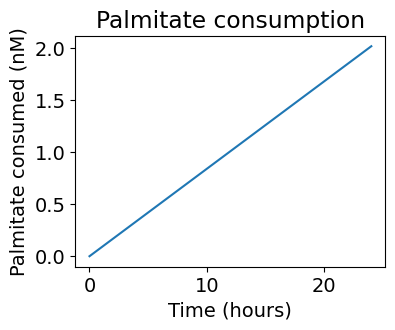

In [10]:
# Plot the estimate as function of the graph 
import matplotlib.pyplot as plt
# Change the font size
plt.rcParams.update({'font.size': 14})
import numpy as np
# 6 cm place 1-3 mL of media 
# Medium contaning 
# 200 - 500 uM palmitate
# 1-3 mL of media
# 200 - 500 nM palmitate

# Low case
palmitate = 200 # uM
media_volume = 1 # mL
palmitate_total = palmitate*media_volume * 1e3 # pM

# Plot palmitate concentration as function of time assumeing
plamitate_consumpution_rate = 1.4 # pmol/min

time = np.linspace(0, 24, 100) # hours

palmitate_consumption = plamitate_consumpution_rate * time * 60 *1e-3 # nM

plt.figure(figsize=(4,3))
plt.plot(time, palmitate_consumption)
plt.xlabel('Time (hours)')
plt.ylabel('Palmitate consumed (nM)')
plt.title('Palmitate consumption')

In [ ]:
# malate turnover 


In [ ]:
# Agilent beta ox seahorse https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9120230/
